In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
customer = pd.read_csv("C:/Users/Wamika/Desktop/Dissertation/Retail Real Data/Customer.csv")
prod_info = pd.read_csv("C:/Users/Wamika/Desktop/Dissertation/Retail Real Data/prod_cat_info.csv")
transaction = pd.read_csv("C:/Users/Wamika/Desktop/Dissertation/Retail Real Data/Transactions.csv")

In [3]:
customer.head(5)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
prod_info.rename(columns={"prod_sub_cat_code":"prod_subcat_code"},inplace=True)

In [5]:
# merge transaction and prod_info table and create a new table "prod_concat"
prod_concatenate = pd.merge(left=transaction, right=prod_info,on=["prod_cat_code","prod_subcat_code"],how="left")
prod_concatenate

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [6]:
#merge "prod_concat" and "customer" table and create the final table "customer_final"
customer_final = pd.merge(left=prod_concatenate, right=customer,right_on="customer_Id", left_on="cust_id", how="left")

In [7]:
# converting "DOB" and "tran_date" from object dtype to dates
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")

In [8]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])
customer_final.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [9]:
# dropping duplicate rows
customer_final.drop_duplicates(inplace=True)

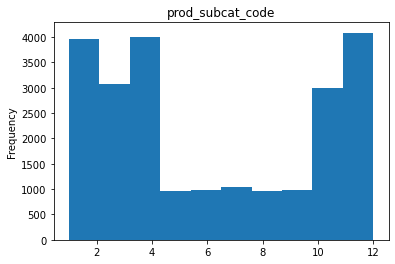

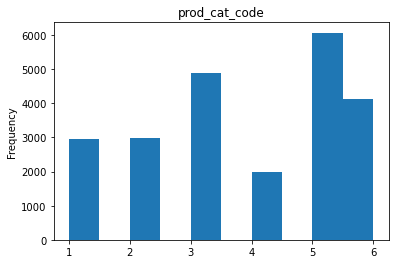

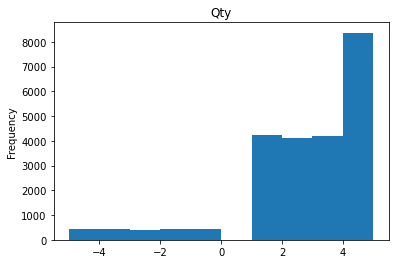

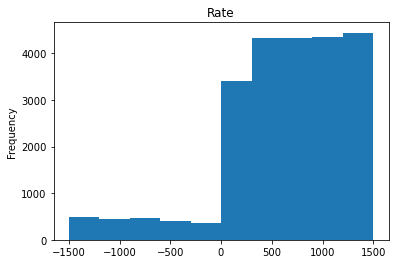

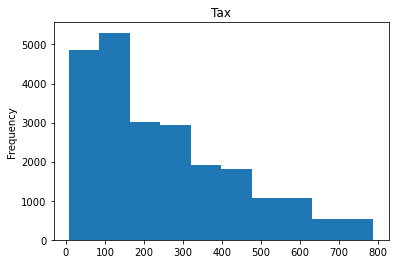

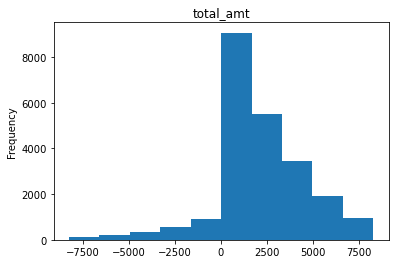

In [10]:
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
for var in conti_customer.columns:
    conti_customer[var].plot(kind='hist')
    plt.title(var)
    plt.show()

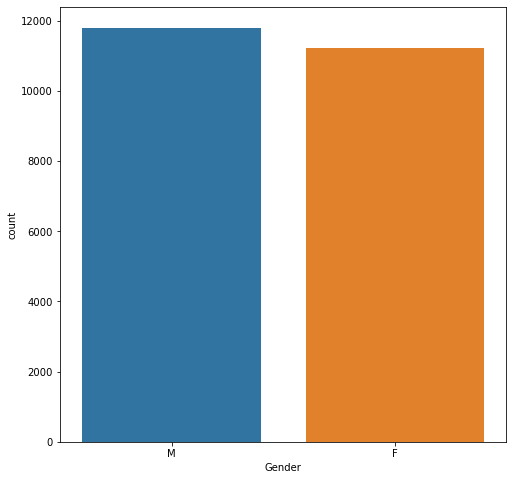

In [11]:
category_customer = customer_final.loc[:,customer_final.dtypes=='object']
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Gender'])
plt.show()

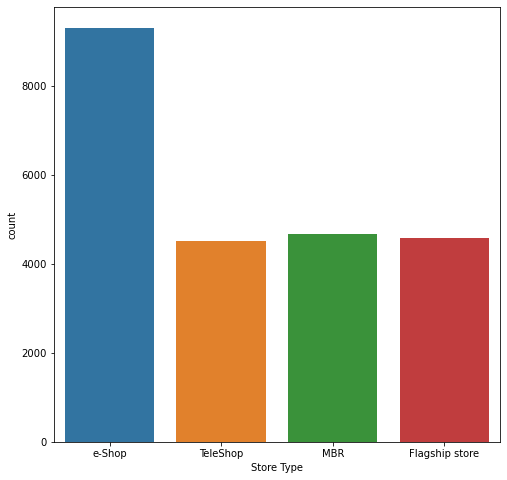

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['Store_type'])
plt.xlabel('Store Type')
plt.show()

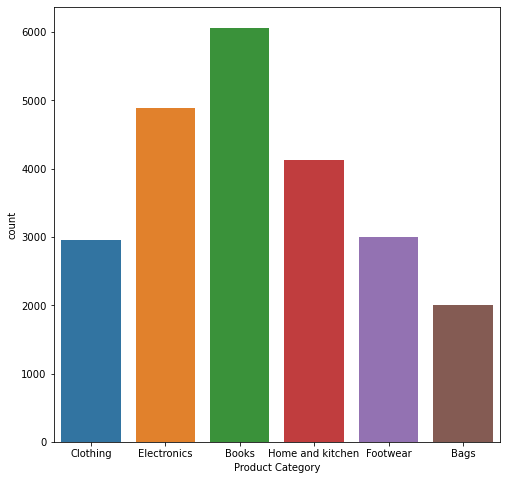

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(category_customer['prod_cat'])
plt.xlabel('Product Category')
plt.show()

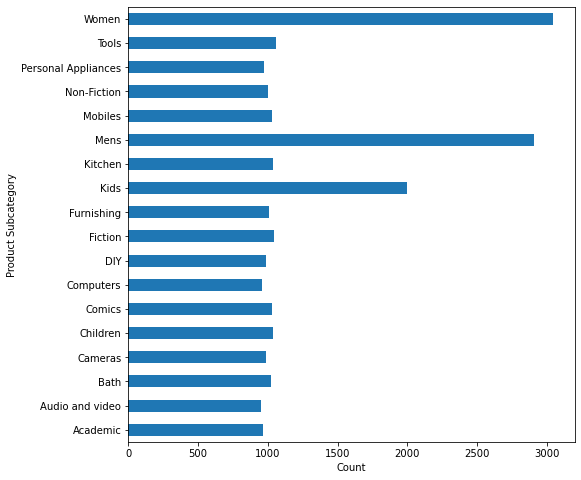

In [14]:
plt.figure(figsize=(8,8))
category_customer.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

In [15]:
#groupby the data set on the basis of "Gender" and "prod_cat"
product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


In [16]:
#There are no names of cities but numbers as city codes
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
customer_group

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

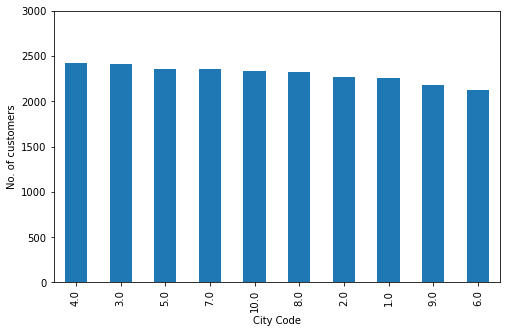

In [17]:
plt.figure(figsize=(8,5))
customer_group.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [18]:
customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)

<ipython-input-18-cbf18b226a4a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_final.groupby("Store_type")["Qty","Rate"].sum().sort_values(by="Qty",ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


In [19]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)
male_earning = gender_group.loc["Electronics","M"]
male_earning

5711351.62

In [20]:
#Adding new column 'age'
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] -  np.timedelta64(100, 'Y'))
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,39.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,48.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,40.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,29.0


In [21]:
#total amount spent for 'Clothing' and 'Books' product categories for customers ahed in 36-46
customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [22]:
# grouping the dataframe 'customer_final' on the basis of 'Age_cat' and 'prod_cat'
customer_36_46 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
customer_36_46

Age_cat  prod_cat        
25-35    Bags                1271311.340
         Books               3976208.795
         Clothing            2180776.065
         Electronics         3531294.910
         Footwear            2057360.825
         Home and kitchen    2755767.235
36-46    Bags                1956494.215
         Books               6337130.800
         Clothing            2979790.515
         Electronics         5039711.625
         Footwear            2917564.650
         Home and kitchen    4174173.965
47-57    Bags                 898536.275
         Books               2519253.035
         Clothing            1090570.910
         Electronics         2159699.295
         Footwear            1250979.340
         Home and kitchen    1514671.015
Name: total_amt, dtype: float64

In [24]:
print("Total amount spent on 'Clothing' and 'Books' product categories for agegroup 36-46 is", 
      customer_36_46.loc['36-46',['Books','Clothing']].sum().round(2))

Total amount spent on 'Clothing' and 'Books' product categories for agegroup 36-46 is 9316921.31
